In [1]:
import pandas as pd
import numpy as np
import time
#Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample 


from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import required preprocessors

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

# Evaluation metric imports
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    log_loss, 
    mean_squared_error)


# 1. Problem Statement

Problem Statement:

Fraudulent activities in bank transactions are a growing challenge. 
This project aims to develop machine learning models to detect and 
prevent fraudulent transactions, ensuring security and customer trust.
Problem Statement:


# Objective:
Create a fraud detection system that accurately identifies fraudulent and legitimate transactions in real-time.
Methodology:
 Tested machine learning models: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Support Vector Machine (SVM). Evaluated using precision, recall, F1-score, accuracy, and log loss.
# Key Decisions:
- Diverse algorithms selected for comprehensive analysis.
- Metrics focused on balancing false positives and negatives.
- Cross-validation used to ensure generalizability.

In [2]:
# LoadDataset

In [3]:
df=pd.read_csv("Base.csv")

In [4]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


Analyzing the dataset structure, including column names, data types, and the number of non-null values. This step helps identify potential issues, such as missing or incorrectly formatted data.


In [5]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [9]:
df.fraud_bool.value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

This heatmap shows the correlation matrix of features related to fraud detection. Each cell represents the correlation coefficient between two features, with color intensity indicating the strength and direction of the correlation.

<Axes: >

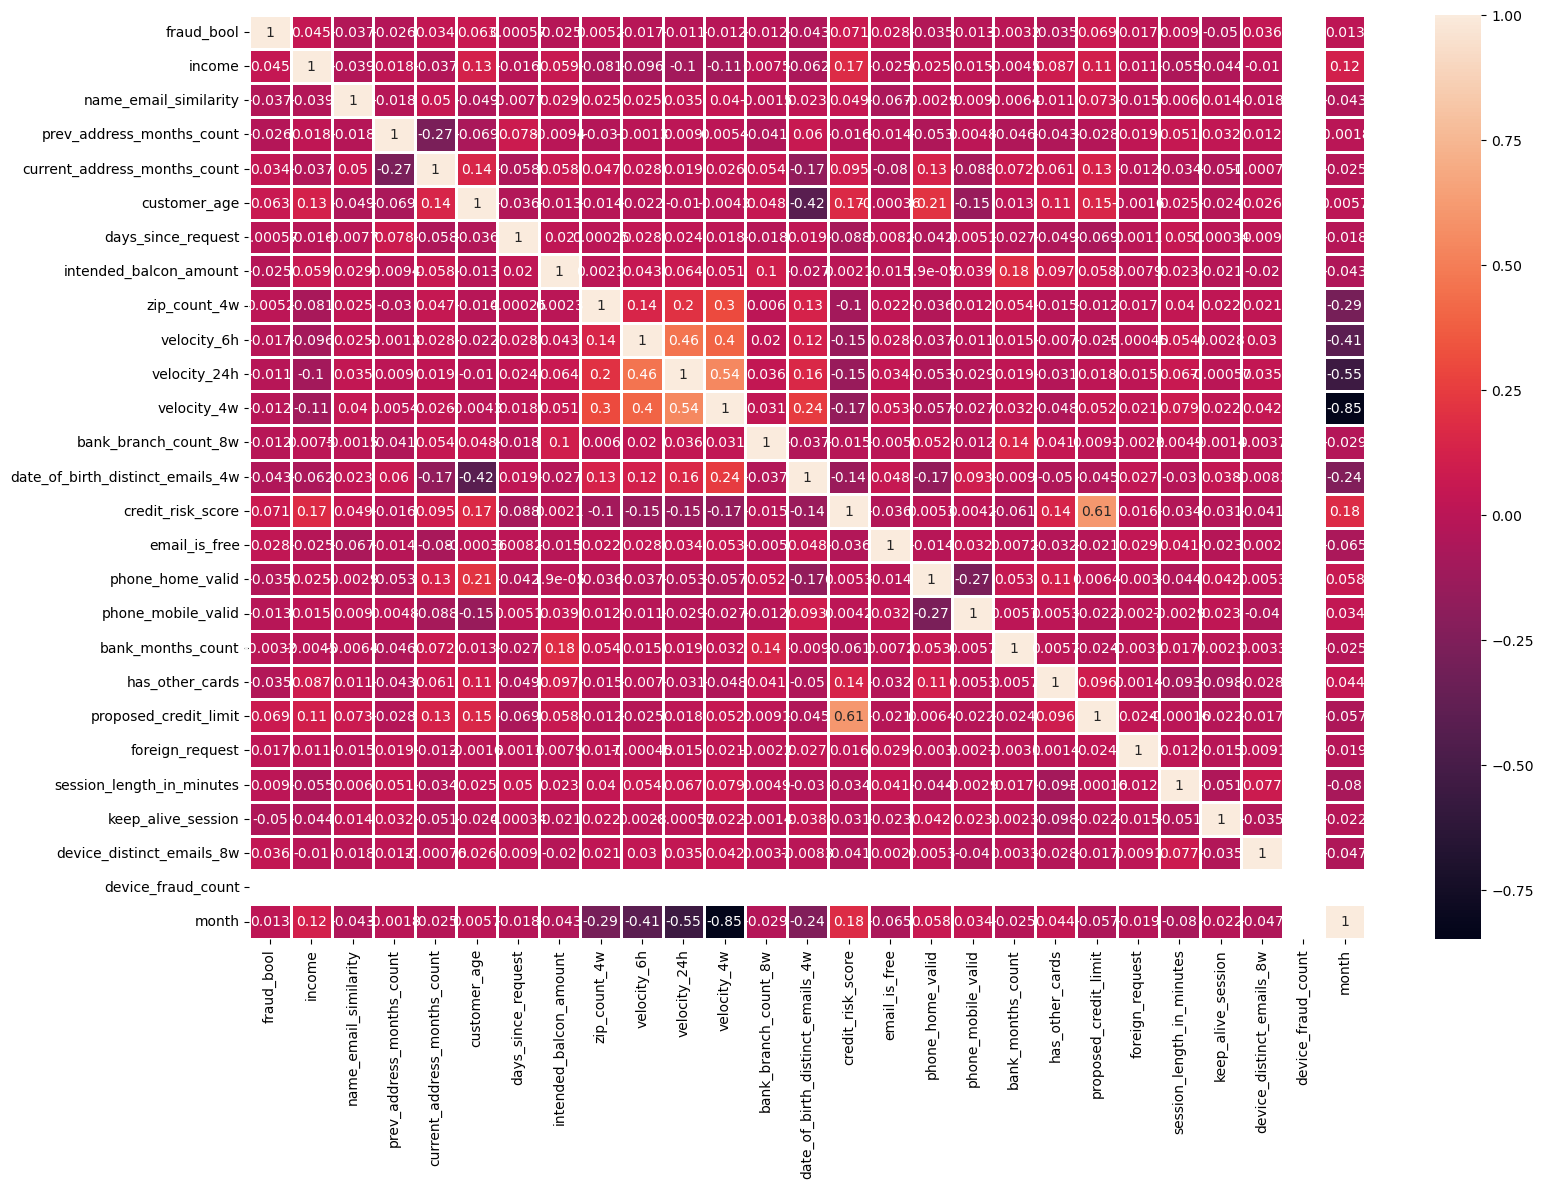

In [10]:
plt.figure(figsize=(18,12))
corr=df.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True,fmt=".2g",linewidth=1)


The first step displays the count of each class in the fraud_bool column to understand the raw distribution of fraud and non-fraud cases. Next, the normalized value counts show the class proportions, helping assess any imbalance. Finally, a count plot visually represents the class distribution, highlighting the difference between fraud and non-fraud instances for better insight.

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
fraud_bool
0    0.988971
1    0.011029
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

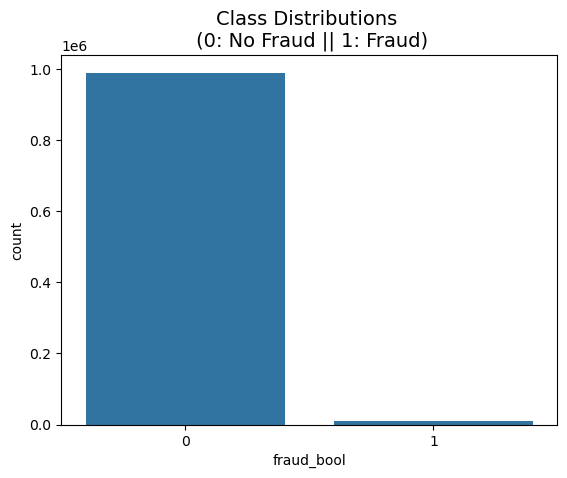

In [11]:
print(df.fraud_bool.value_counts(normalize=False))
print(df.fraud_bool.value_counts(normalize=True))
sns.countplot(x='fraud_bool', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

This step examines each categorical column, displaying its name, unique values, and the frequency of each category, including any missing data. It offers insights into the distribution and diversity of categorical features. The separator line improves clarity and organizes the output for better readability.

In [12]:
cat_df = df.select_dtypes(include = ['object'])

In [13]:
for col in cat_df.columns:
    print(f"Column: {col}")
    print(f"Unique Values: {cat_df[col].unique()}")
    print("Value Counts:")
    print(cat_df[col].value_counts(dropna=False))
    print("-" * 40)  # Line separator for readability


Column: payment_type
Unique Values: ['AA' 'AD' 'AB' 'AC' 'AE']
Value Counts:
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64
----------------------------------------
Column: employment_status
Unique Values: ['CB' 'CA' 'CC' 'CF' 'CD' 'CE' 'CG']
Value Counts:
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64
----------------------------------------
Column: housing_status
Unique Values: ['BC' 'BE' 'BD' 'BA' 'BB' 'BF' 'BG']
Value Counts:
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
----------------------------------------
Column: source
Unique Values: ['INTERNET' 'TELEAPP']
Value Counts:
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64
----------------------------------------
Column: device_os
Unique Values: ['linux' 'other' 'windows' 'x11' 'ma

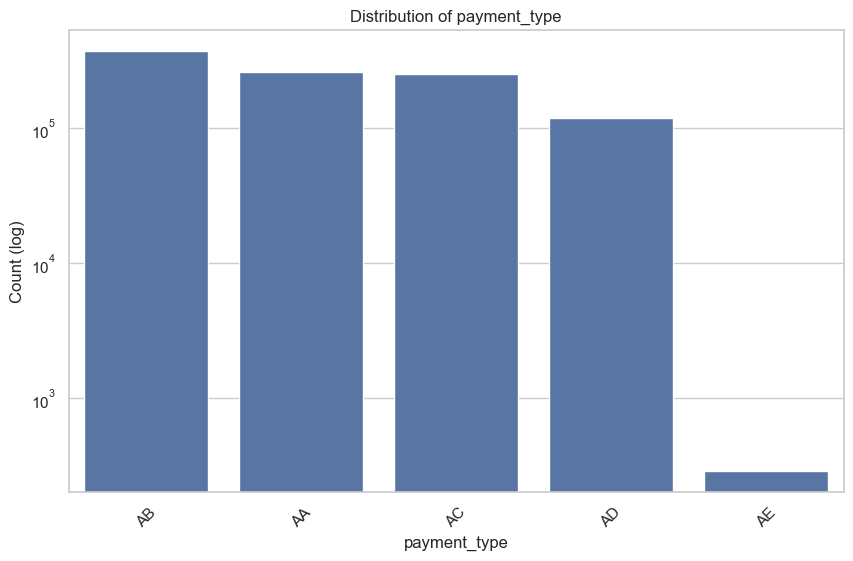

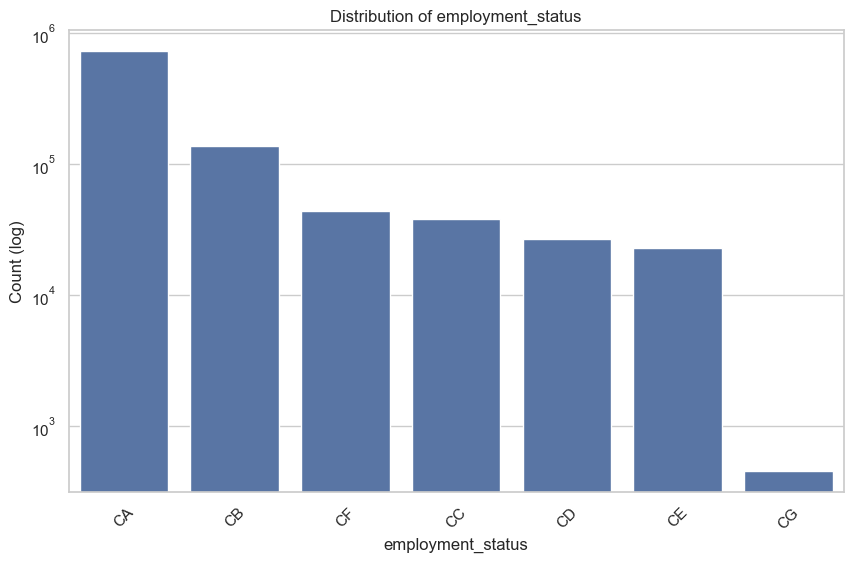

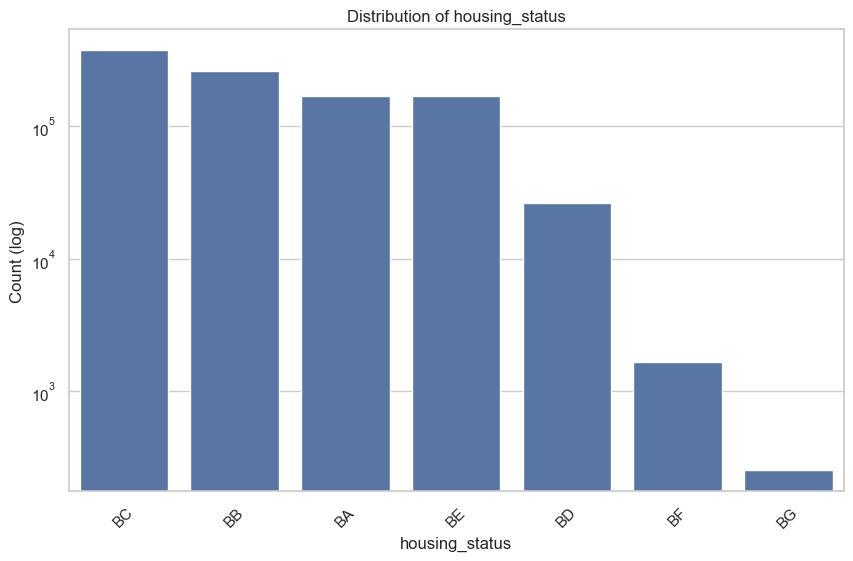

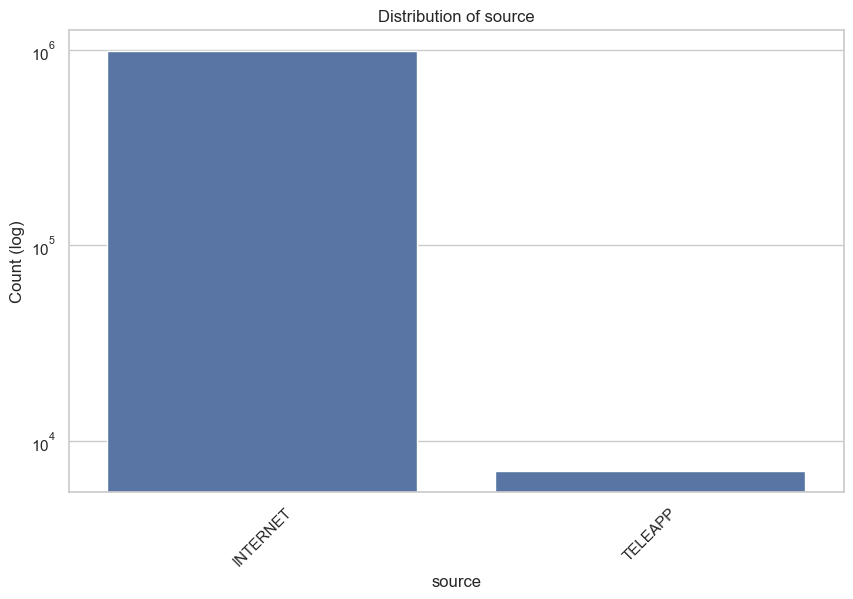

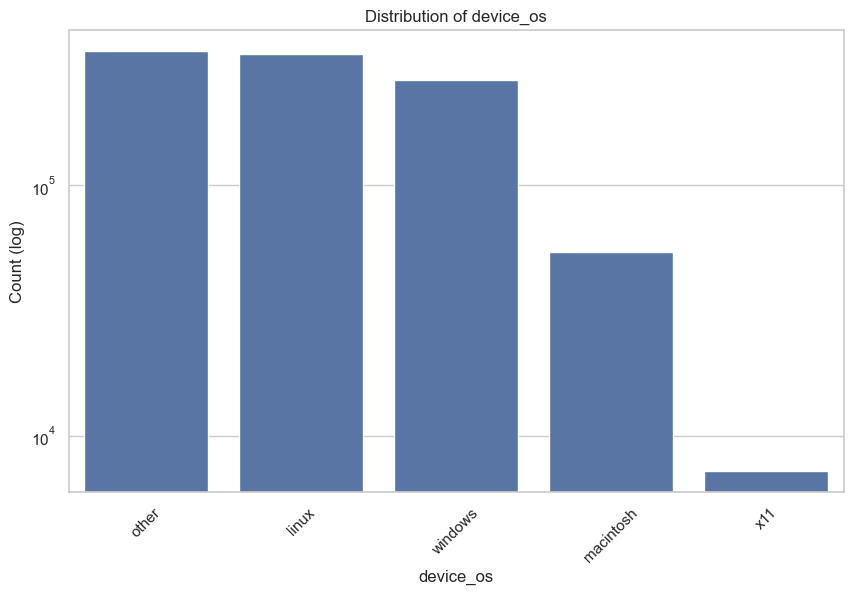

In [14]:
sns.set(style="whitegrid")

# Iterate through each column in the categorical DataFrame
for col in cat_df.columns:
    # Set up the figure for each chart
    plt.figure(figsize=(10, 6))
    
    # Plot the value counts as a bar chart
    sns.countplot(data=cat_df, x=col, order=cat_df[col].value_counts().index)
    
    # Add title and labels
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.ylabel('Count (log)')
    plt.yscale('log')
    # Rotate x-axis labels if they are too long
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()



In [15]:
num_df = df.select_dtypes(exclude = ['object'])

In [16]:
num_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month'],
      dtype='object')

In [17]:
num_df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,1,9,0,1500.0,0,16.224843,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,2,0,1500.0,0,3.363854,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,1,30,0,200.0,0,22.730559,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,1,1,0,200.0,0,15.215816,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,26,0,200.0,0,3.743048,0,1,0,0


This step generates histograms for each numerical column in the dataset to visualize the distribution of their values. The plots are customized with titles, axis labels, and colors for better readability, helping to identify the data’s spread, skewness, or potential outliers. Each histogram is displayed individually to focus on one feature at a time.

<Figure size 1000x600 with 0 Axes>

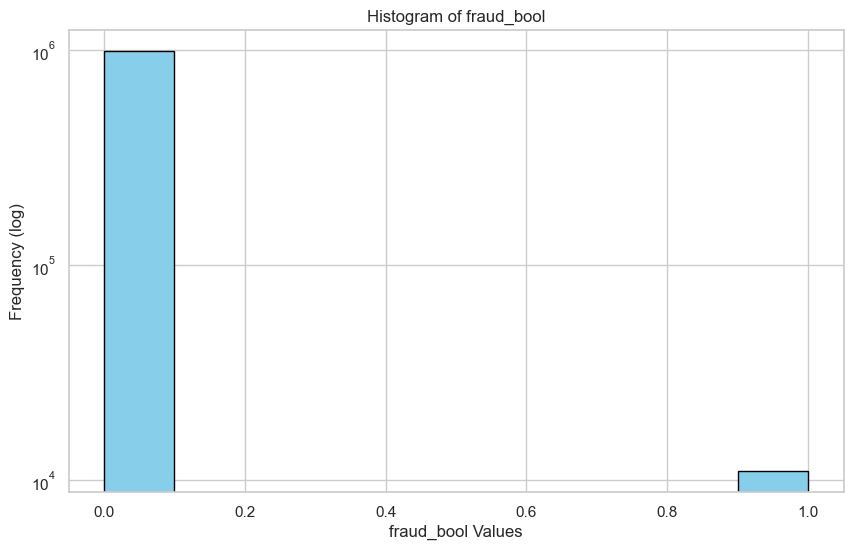

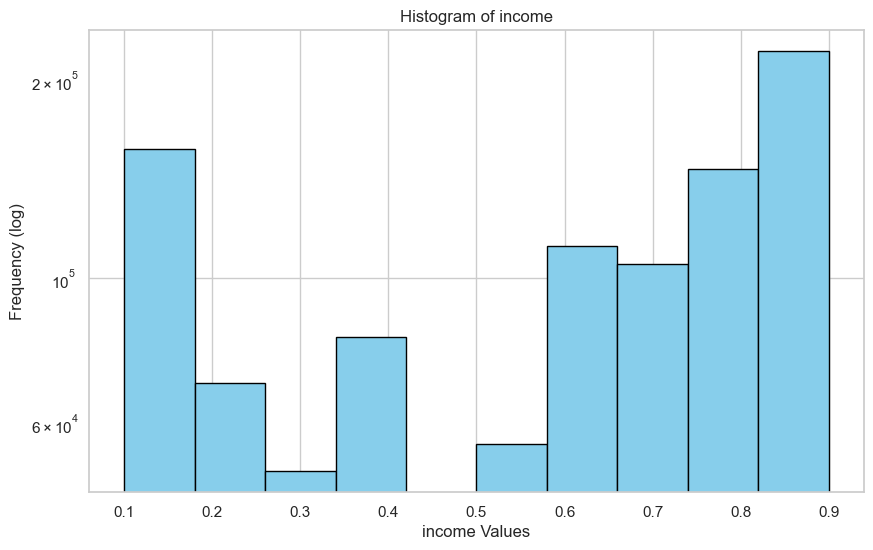

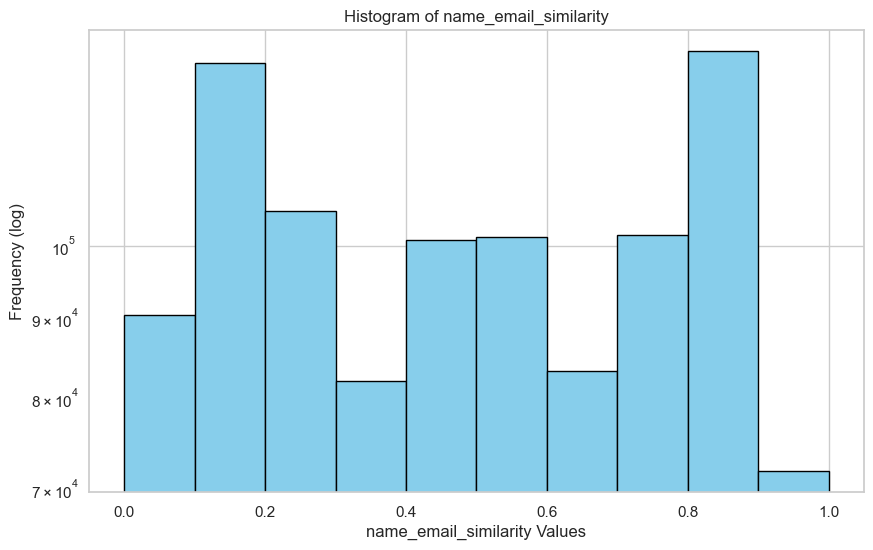

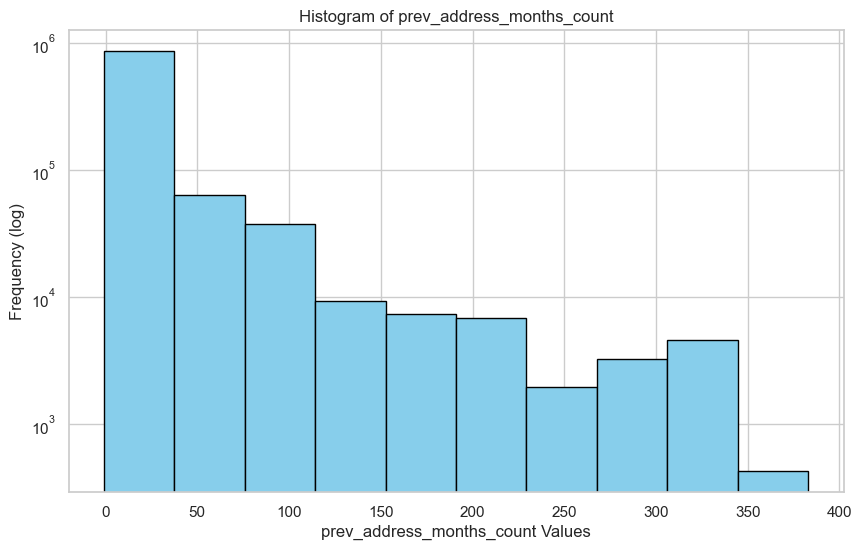

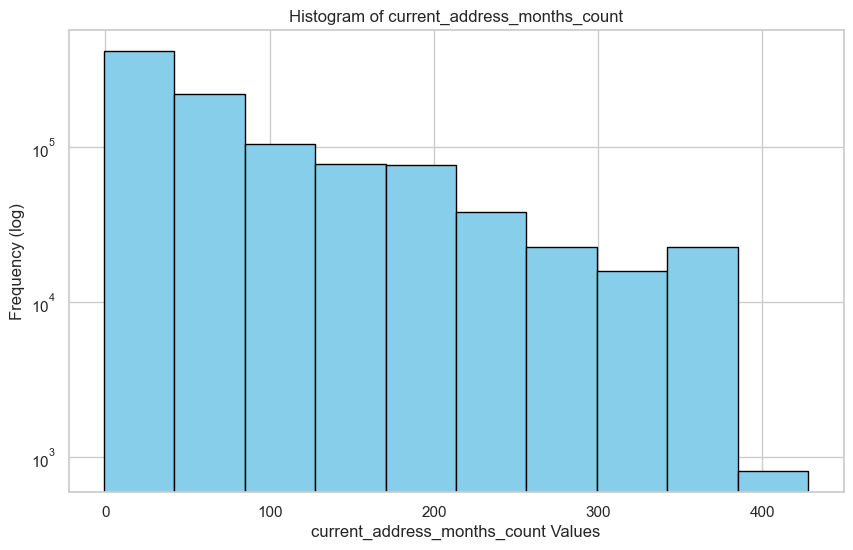

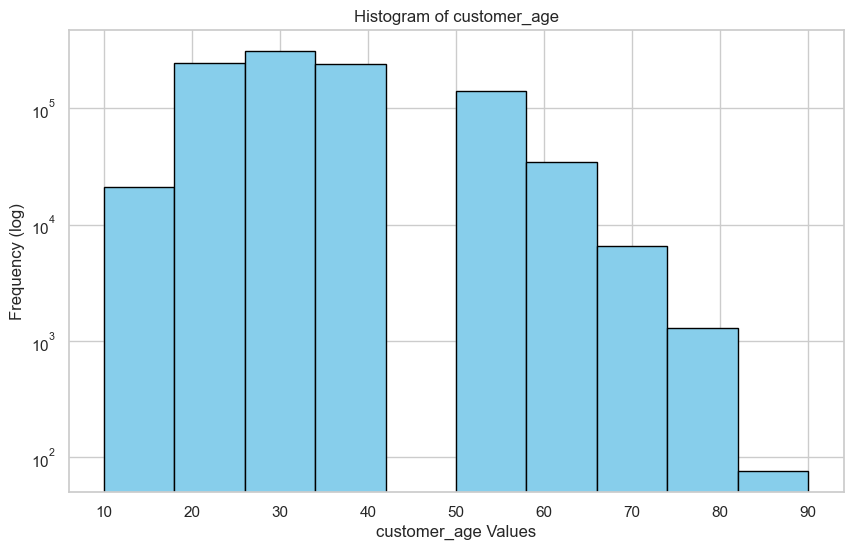

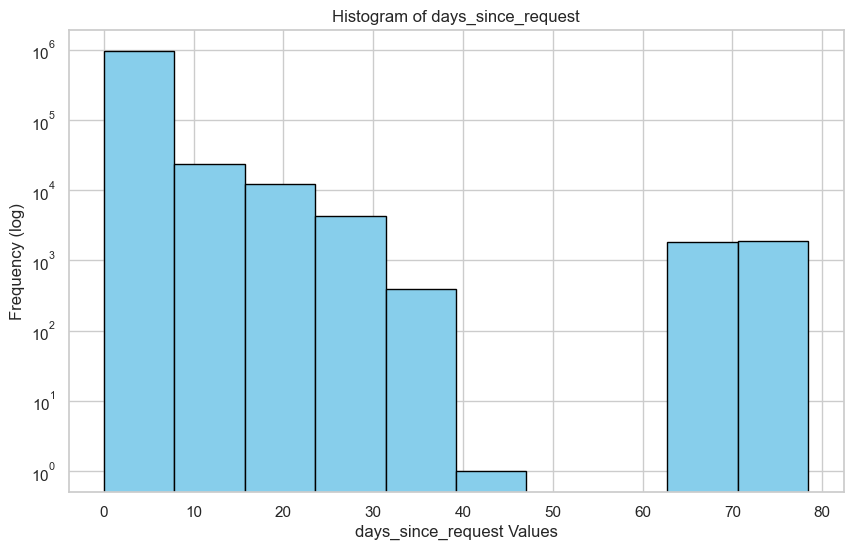

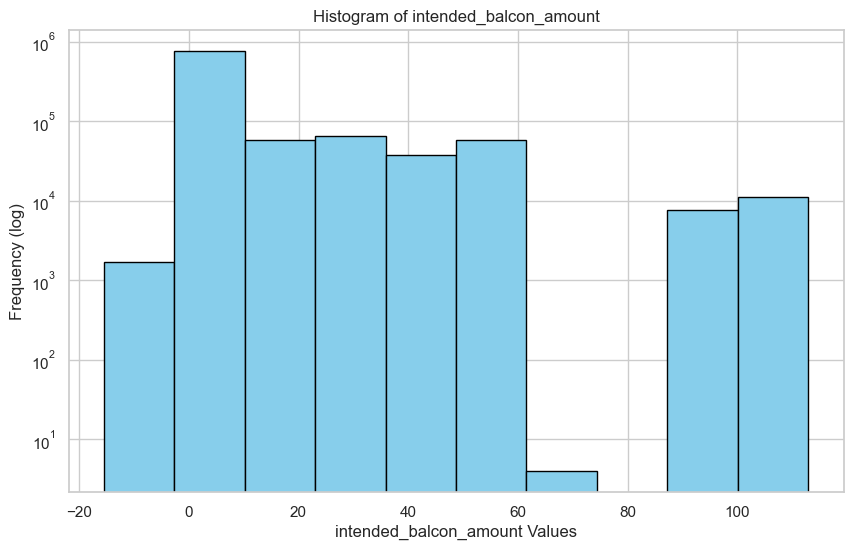

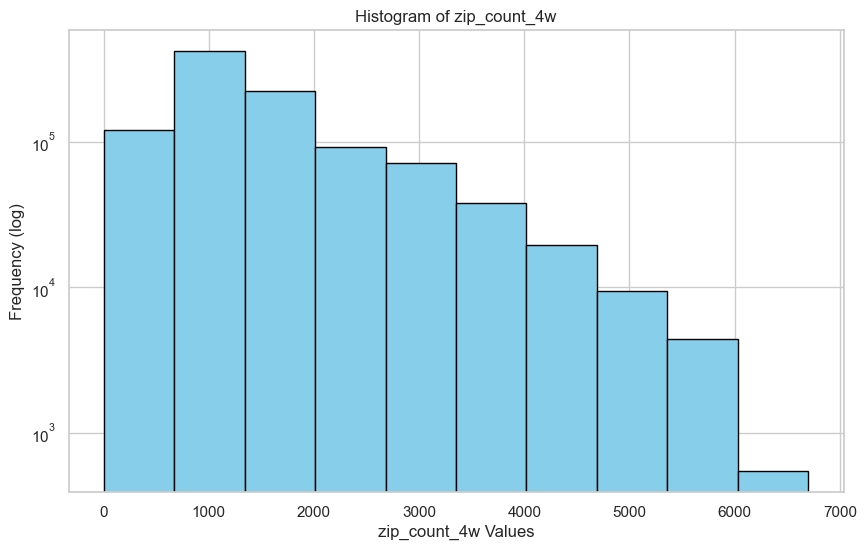

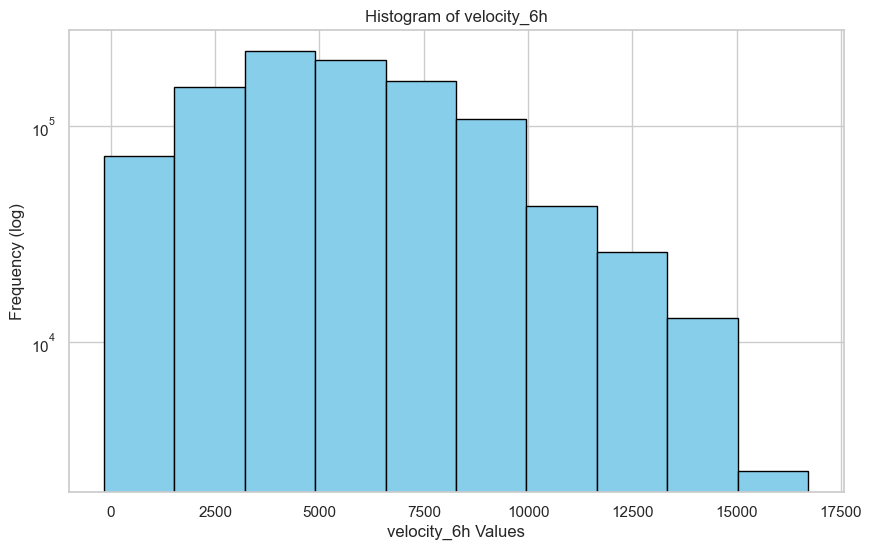

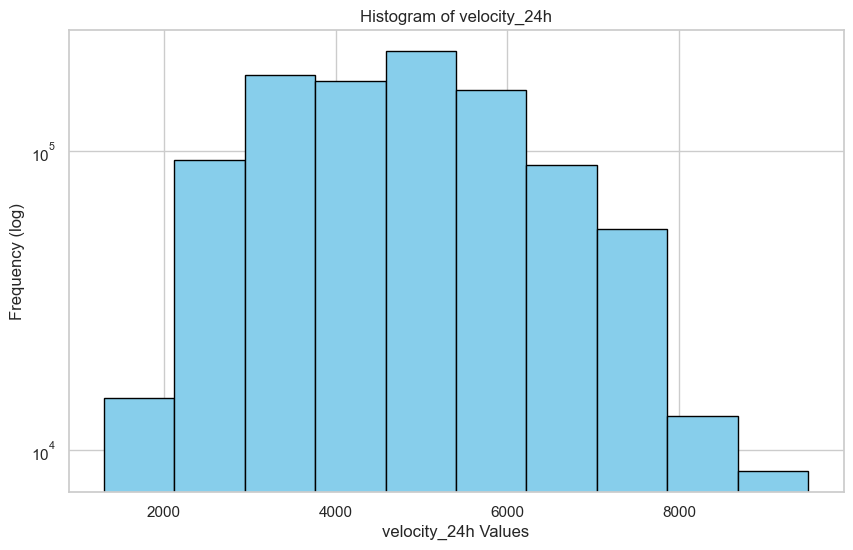

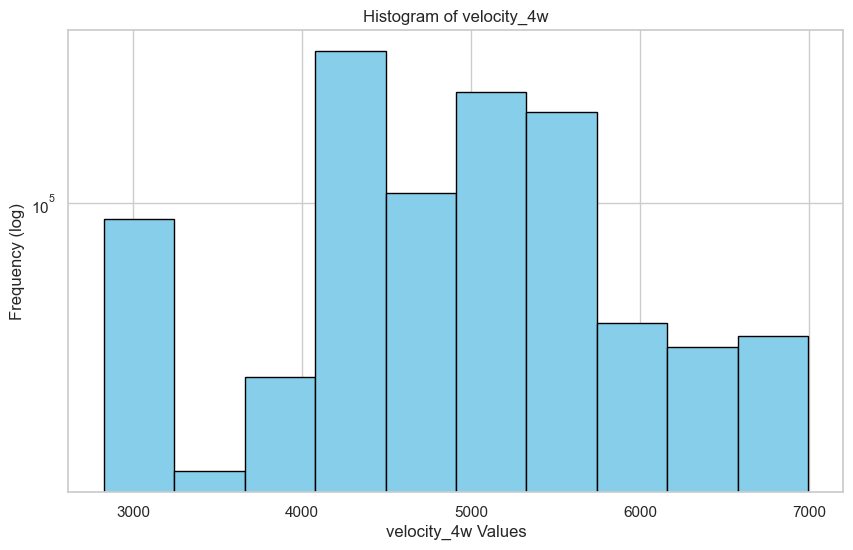

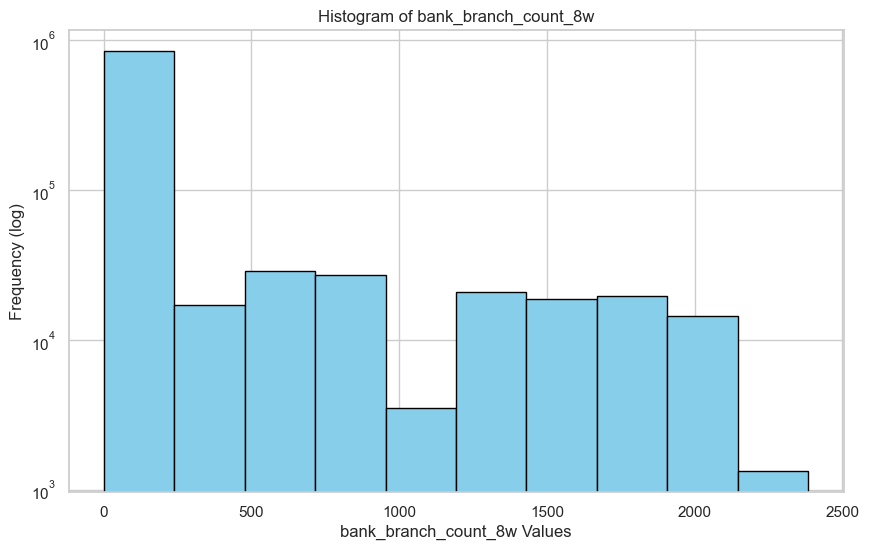

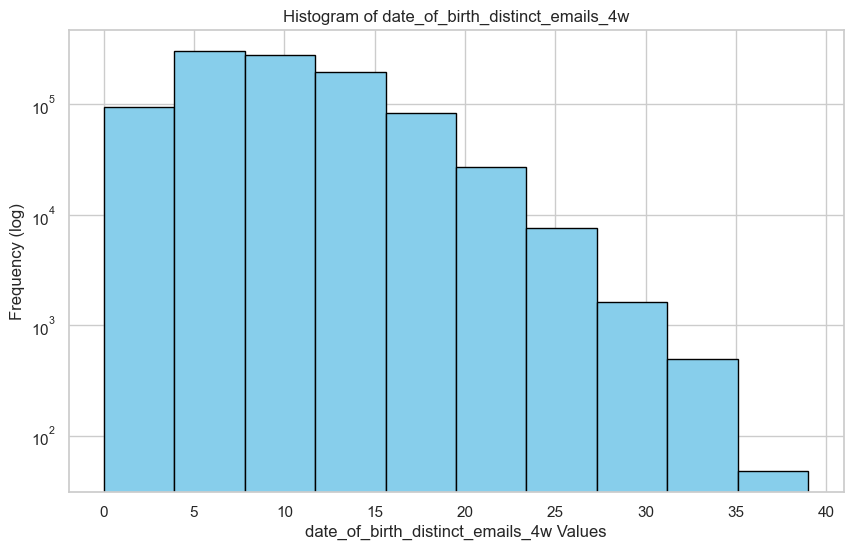

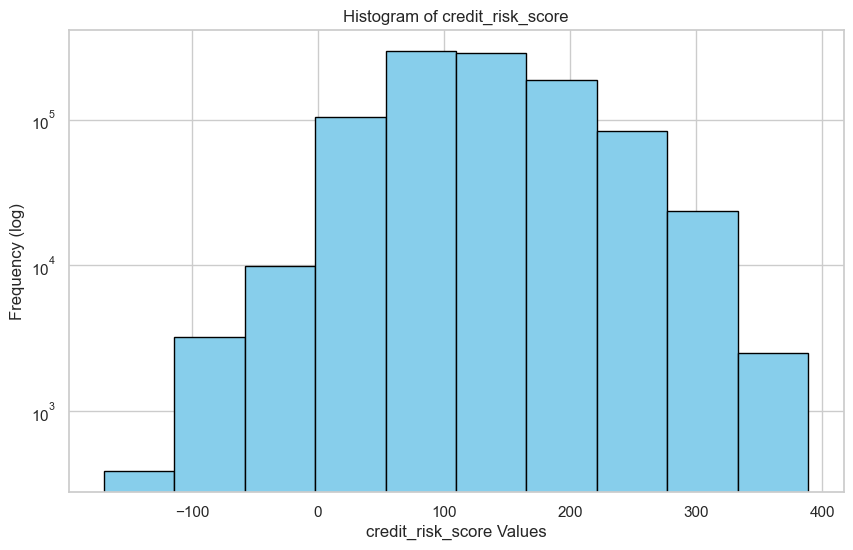

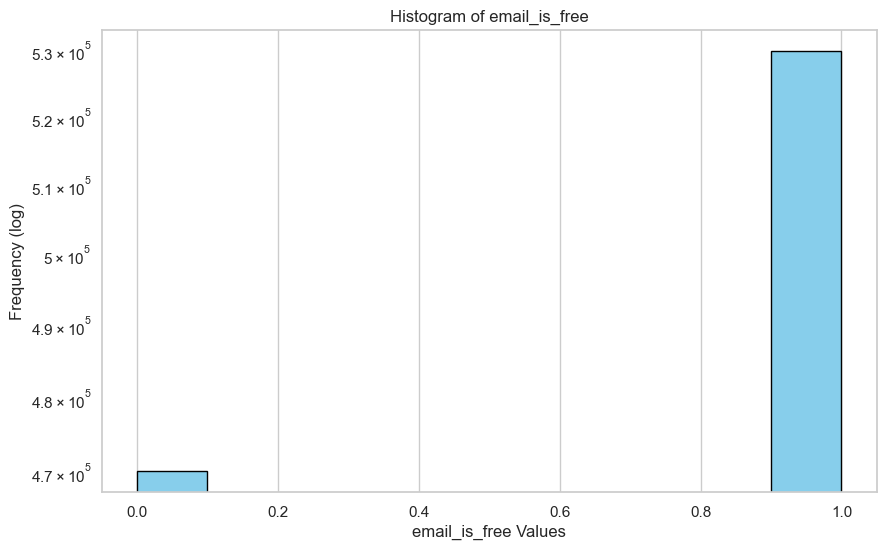

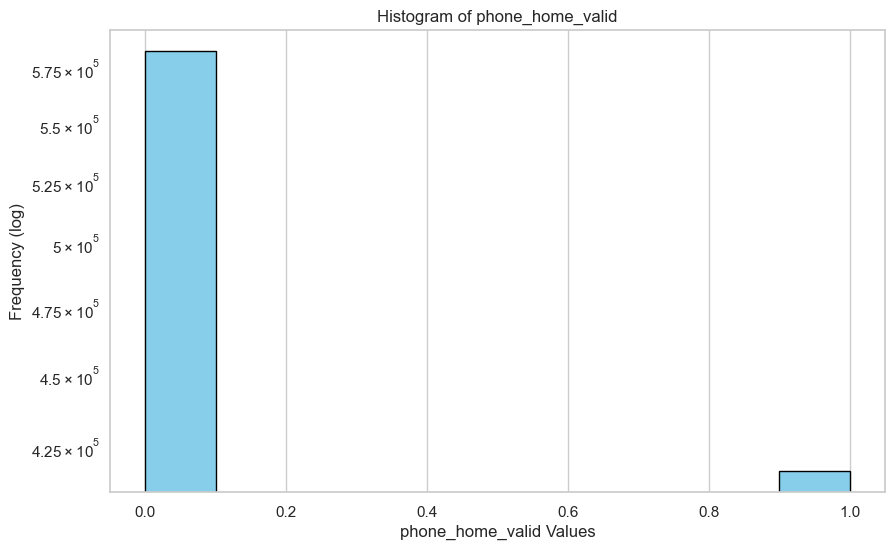

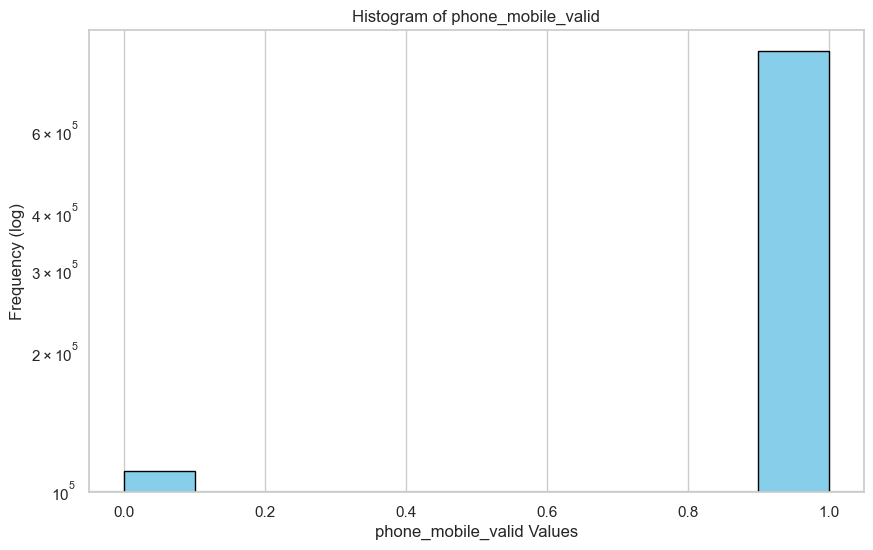

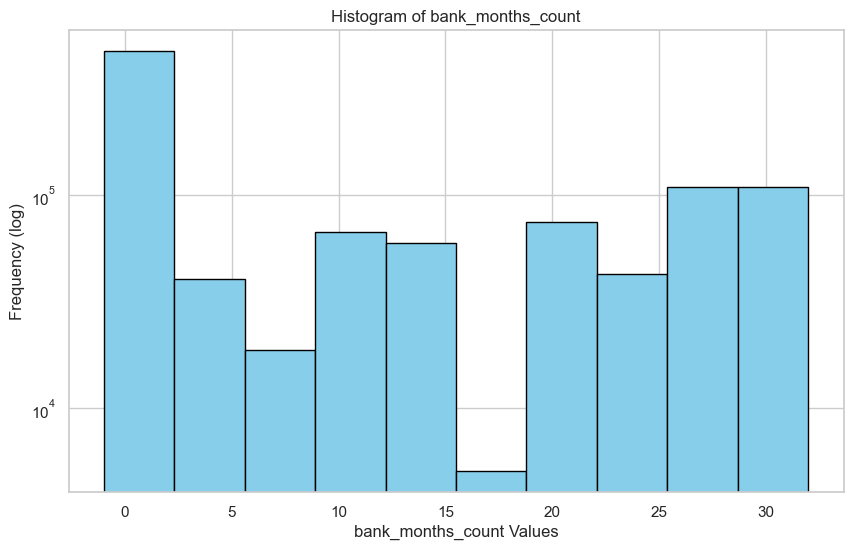

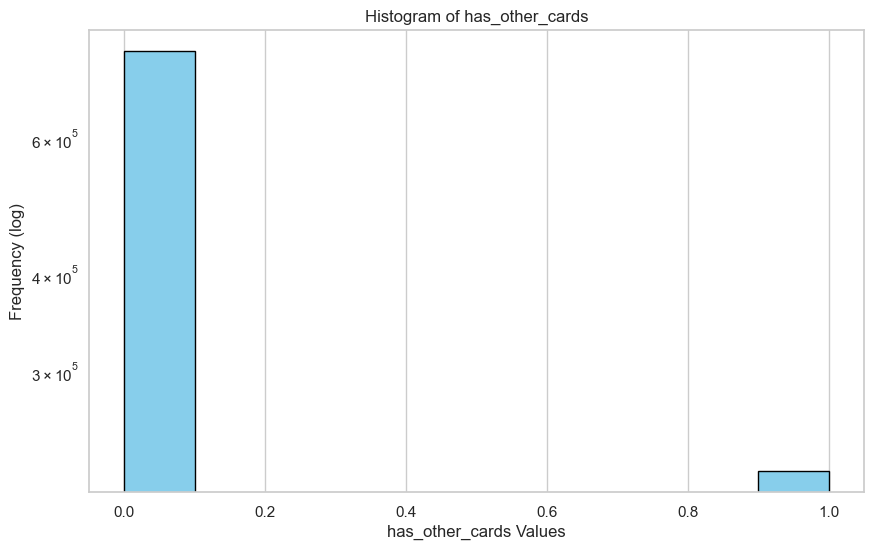

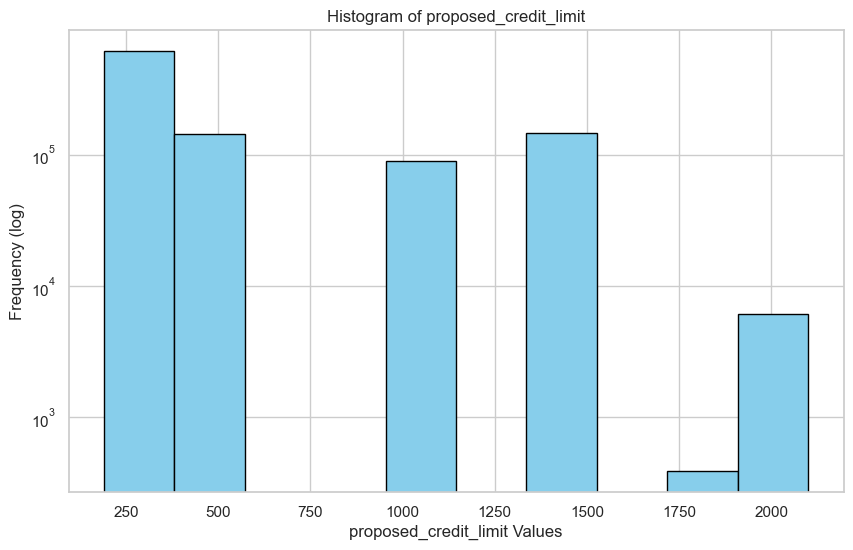

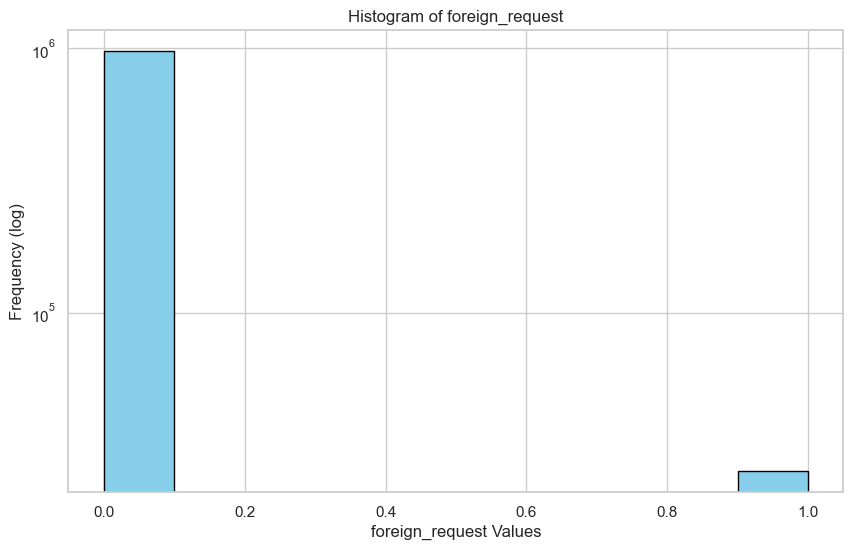

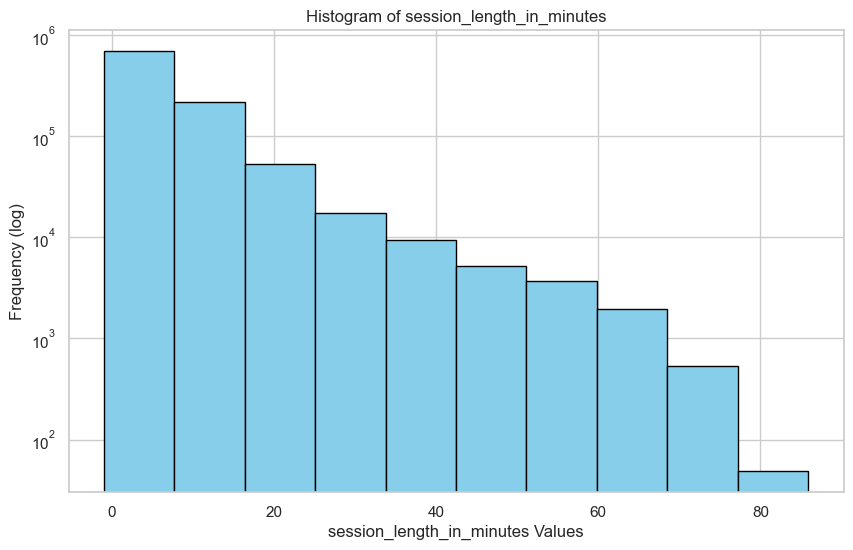

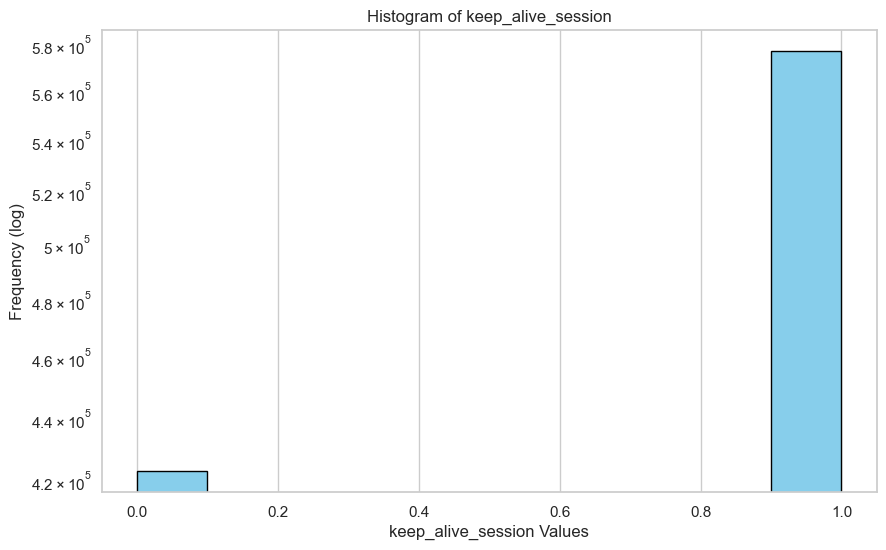

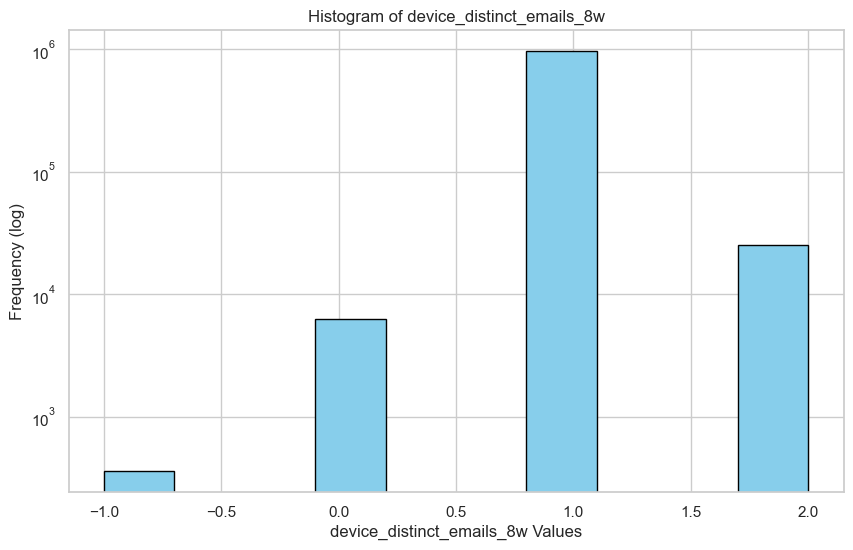

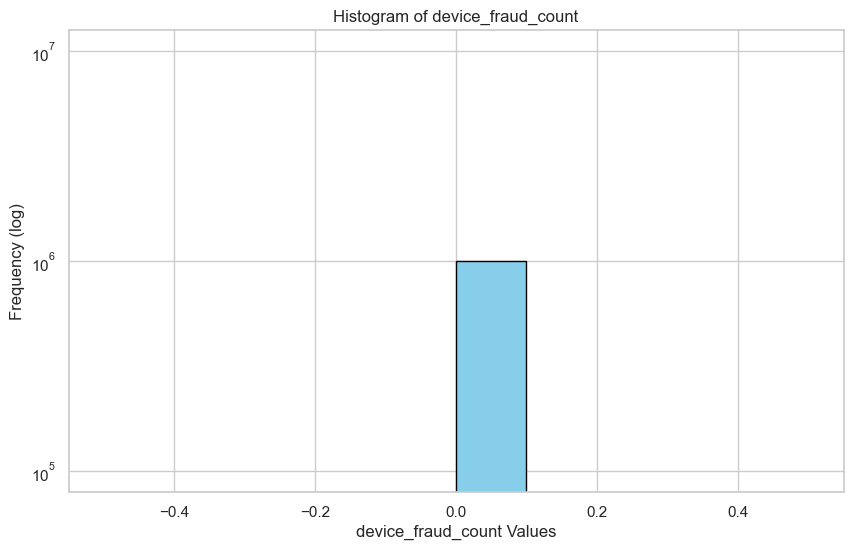

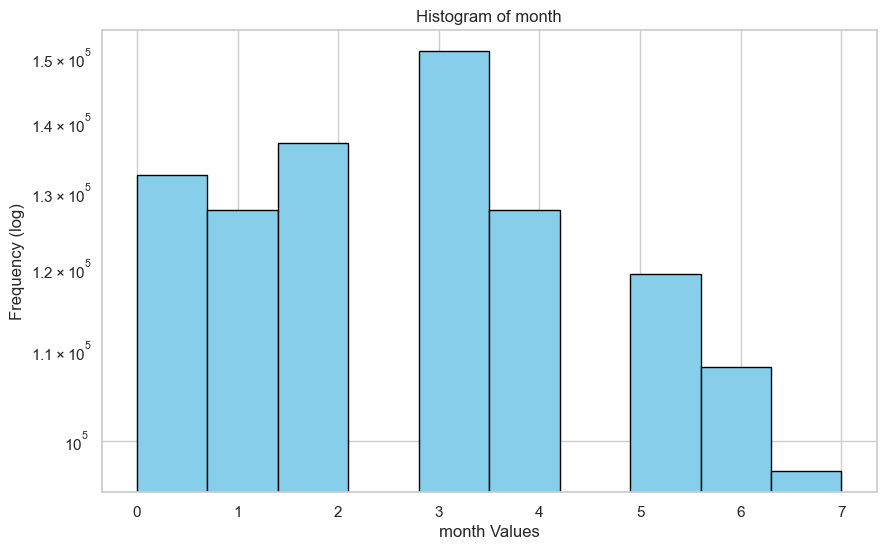

In [18]:
plt.figure(figsize=(10, 6))


for col in num_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(num_df[col], color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col} Values")
    plt.ylabel("Frequency (log)")
    plt.yscale('log')
    plt.show()

This step separates the target variable fraud_bool from the features in the dataset. It then categorizes the features into numerical and categorical variables based on their data types for further analysis.

In [19]:
# Separate the target variable if needed
target_variable = 'fraud_bool'
features = df.drop(columns=[target_variable])


In [20]:
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Data Preprocessing

In [21]:
df_fraud = df[df['fraud_bool'] == 1]
df_non_fraud = df[df['fraud_bool'] == 0]


This step performs downsampling on the non-fraud class to match the number of instances in the fraud class. It selects a random subset of non-fraud samples without replacement, ensuring an equal distribution between the classes.

In [22]:
df_non_fraud_downsampled = resample(df_non_fraud,
                                    replace=False,  # sample without replacement
                                    n_samples=len(df_fraud),  # to match minority class
                                    random_state=42)  # for reproducibility



In [23]:
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_fraud, df_non_fraud_downsampled])

In [24]:
df_non_fraud_downsampled.shape

(11029, 32)

In [25]:
df_non_fraud_downsampled.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
518794,0,0.8,0.735925,104,10,30,0.030076,-1.480613,AB,2062,...,0,200.0,0,INTERNET,3.742273,other,1,1,0,3
567631,0,0.9,0.313330,-1,30,30,0.002789,-1.303670,AB,1498,...,0,200.0,0,INTERNET,3.669544,other,1,1,0,4
269688,0,0.1,0.129044,-1,238,20,0.013602,-1.027149,AB,1019,...,0,200.0,0,INTERNET,3.411296,linux,1,1,0,2
375838,0,0.9,0.071233,-1,65,30,0.005794,-0.877066,AD,1140,...,1,200.0,0,INTERNET,5.310112,linux,1,1,0,2
558695,0,0.1,0.920019,62,13,30,0.018723,50.296179,AA,1103,...,0,1500.0,0,INTERNET,20.368814,linux,1,1,0,4


In [26]:
df_balanced.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,0,1500.0,0,INTERNET,12.928072,windows,0,1,0,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,0,1500.0,0,INTERNET,2.550167,linux,0,1,0,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,...,0,1500.0,0,INTERNET,3.500856,windows,0,1,0,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0


In [27]:
df_balanced.shape

(22058, 32)

In [28]:

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [29]:
df_balanced.shape

(22058, 32)

This step defines the preprocessing pipeline for the dataset. It specifies transformations for numerical features using StandardScaler to standardize them, and for categorical features, it applies OneHotEncoder to convert them into binary format, dropping the first category to avoid multicollinearity. The ColumnTransformer ensures that both transformations are applied to the respective feature groups efficiently.

In [30]:
# Define categorical and numerical features
categorical_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
numerical_columns = df_balanced.drop(columns=['fraud_bool', 'month'] + categorical_columns).columns.tolist()

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns) ]
)

# Model Train :

In [32]:
train_data = df_balanced[df_balanced['month'].between(0, 5)] 
test_data = df_balanced[df_balanced['month'].between(6, 7)]  

In [33]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [34]:
# Separate features and target variable for the training data
X_train = train_data.drop('fraud_bool', axis=1)  # Features of the training dataset
y_train = train_data['fraud_bool']  # Target variable of the training dataset

# Separate features and target variable for the testing data
X_test = test_data.drop('fraud_bool', axis=1)  # Features of the testing dataset
y_test = test_data['fraud_bool']  # Target variable of the testing dataset


In [35]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [36]:
X_train_transformed.shape

(16934, 46)

In [37]:
X_test_transformed.shape

(5124, 46)

This code evaluates multiple machine learning models for fraud detection. Each model is trained on the training dataset and then makes predictions on the test dataset. Various performance metrics, such as accuracy, mean squared error, ROC-AUC score, and log loss, are calculated for each model. The results, including training and prediction times, are stored for comparison.

In [38]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),    
}

In [39]:
# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

In [40]:
for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test, y_test_pred)}")
    accuracy = accuracy_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test, y_test_prob)
        logloss = log_loss(y_test, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })


Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      2246
           1       0.86      0.74      0.80      2878

    accuracy                           0.79      5124
   macro avg       0.79      0.79      0.79      5124
weighted avg       0.80      0.79      0.79      5124

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2246
           1       0.76      0.75      0.76      2878

    accuracy                           0.73      5124
   macro avg       0.72      0.72      0.72      5124
weighted avg       0.73      0.73      0.73      5124

Algorithm: Random Forest
Random Forest Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2246
           1       0.84      0.76      0.80      2878

    acc

In [41]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [42]:
# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

In [43]:
# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

In [44]:
# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

In [45]:
results_df.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Mean Squared Error,Training Time (s),Prediction Time (s),Total Time (s),Normalized Accuracy,Normalized ROC-AUC Score,Normalized Log Loss,Normalized Mean Squared Error,Normalized Total Time,Aggregate Score,Rank
0,Logistic Regression,0.785909,0.874041,0.462816,0.214091,0.262820,0.002656,0.265475,0.791444,0.994517,0.987904,0.791444,1.000000,0.913062,1.0
1,KNN,0.728142,0.783150,2.022003,0.271858,0.006671,1.610621,1.617292,0.000000,0.000000,0.000000,0.000000,0.994132,0.198826,4.0
2,Random Forest,0.783568,0.864560,0.481724,0.216432,11.968168,0.274829,12.242997,0.759358,0.890778,0.975924,0.759358,0.948005,0.866685,2.0
3,SVM,0.801132,0.874542,0.443726,0.198868,218.946859,11.679912,230.626771,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,3.0


In [46]:
# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

In [47]:
results_df.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Mean Squared Error,Training Time (s),Prediction Time (s),Total Time (s),Normalized Accuracy,Normalized ROC-AUC Score,Normalized Log Loss,Normalized Mean Squared Error,Normalized Total Time,Aggregate Score,Rank
0,Logistic Regression,0.785909,0.874041,0.462816,0.214091,0.262820,0.002656,0.265475,0.791444,0.994517,0.987904,0.791444,1.000000,0.913062,1.0
2,Random Forest,0.783568,0.864560,0.481724,0.216432,11.968168,0.274829,12.242997,0.759358,0.890778,0.975924,0.759358,0.948005,0.866685,2.0
3,SVM,0.801132,0.874542,0.443726,0.198868,218.946859,11.679912,230.626771,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000,3.0
1,KNN,0.728142,0.783150,2.022003,0.271858,0.006671,1.610621,1.617292,0.000000,0.000000,0.000000,0.000000,0.994132,0.198826,4.0


In [48]:
# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 
                             'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

In [49]:
# Print the final DataFrame with ranks and model names
ranked_results.head()

,Model,Accuracy,ROC-AUC Score,Log Loss,Mean Squared Error,Training Time (s),Prediction Time (s),Total Time (s),Aggregate Score
0,Logistic Regression,0.785909,0.874041,0.462816,0.214091,0.262820,0.002656,0.265475,0.913062
2,Random Forest,0.783568,0.864560,0.481724,0.216432,11.968168,0.274829,12.242997,0.866685
3,SVM,0.801132,0.874542,0.443726,0.198868,218.946859,11.679912,230.626771,0.800000
1,KNN,0.728142,0.783150,2.022003,0.271858,0.006671,1.610621,1.617292,0.198826


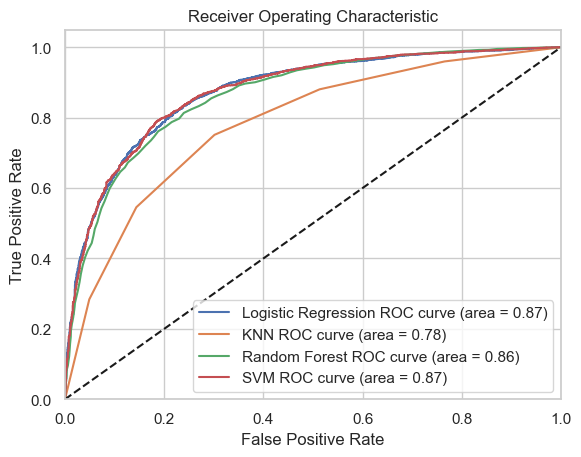

In [50]:
# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Key Insights:
- SVM and Logistic Regression are top performers.
- Decision Tree and KNN showed lower performance.

# Recommendations for Banks:
1. Primary Model: Use SVM for fraud detection due to its highest accuracy and ROC-AUC.
2. Secondary Model: Implement Logistic Regression as a backup model.
3. Continuous Monitoring: Regularly monitor and retrain models to adapt to evolving fraud patterns.
4. Optimize Resources for SVM: Focus on improving and scaling SVM for better efficiency.

# Conclusion:
SVM and Logistic Regression is the most effective model for fraud detection in credit card applications, helping financial institutions reduce fraudulent transactions.
